In [26]:
#library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



In [27]:
#Load the data
data = pd.read_csv("data.csv")

In [28]:
#"Years Experience" column into the variable X:
X = data["YearsExperience"]
# "salary" column into the variable Y:
Y = data["Salary"]

In [29]:
#training and testing in 65% and 35% proportion 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35)

## Linear Regression

In [30]:
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train.values.reshape(-1, 1), Y_train)

LinearRegression()

In [31]:
# Make predictions on the testing set
Y_pred = model.predict(X_test.values.reshape(-1, 1))
print(Y_pred)

[117757.7663025   90524.56862988  60373.52834948 126511.29412584
  72044.8987806   55510.45733651  38976.01589242  53565.22893132
 109004.23847916  43839.08690539  81771.04080654]


In [32]:
# Calculate the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)


R2 Score: 0.9752849685403605


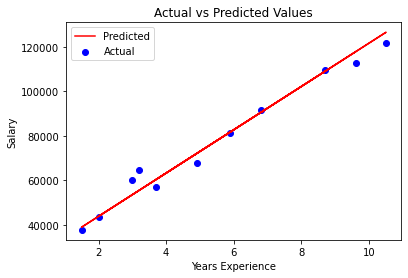

In [33]:
# Create a scatter plot of actual vs predicted values
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred, color='red', label='Predicted')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


## Polynomial regression

In [58]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train.values.reshape(-1, 1))

# Create a polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, Y_train)

LinearRegression()

In [59]:
# Transform the testing set features using the polynomial features
X_test_poly = poly_features.transform(X_test.values.reshape(-1, 1))

# Make predictions on the testing set
Y_pred = poly_regression.predict(X_test_poly)
print(Y_pred)

[118728.90396407  89776.8578691   59957.10642955 128441.71034119
  71221.71206746  55367.3564308   40219.08344335  53548.5587792
 109213.99618413  44601.16207469  80877.63461375]


In [60]:
# Calculate the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 score:", r2)

R2 score: 0.971018321350494


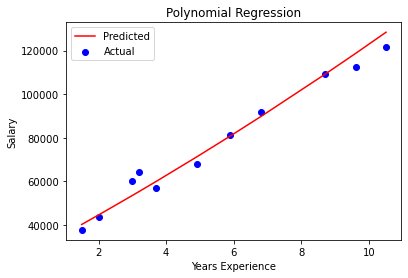

In [37]:

# Plotting the actual values
plt.scatter(X_test, Y_test, color='blue', label='Actual')

# Sort the testing set features and predictions for a smoother curve
sort_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values[sort_indices].flatten()
Y_pred_sorted = Y_pred[sort_indices]

# Plotting the polynomial regression predictions
plt.plot(X_test_sorted, Y_pred_sorted, color='red', label='Predicted')

plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


## KNN


In [52]:
# Create KNN regression model
knn = KNeighborsRegressor(n_neighbors=3)  # You can adjust the number of neighbors as needed
knn.fit(X_train.values.reshape(-1, 1), Y_train)



KNeighborsRegressor(n_neighbors=3)

In [53]:
# Predict on the test set
Y_pred = knn.predict(X_test.values.reshape(-1, 1))

print(Y_pred)

[114980.66666667  97838.33333333  58656.33333333 114980.66666667
  70076.          58101.66666667  41813.          50326.
 106898.66666667  47579.33333333  81019.        ]


In [55]:
# Calculate the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 score:", r2)

R2 score: 0.9664650904562682


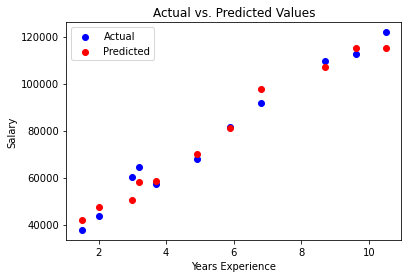

In [41]:
# Create a scatter plot of actual vs predicted values
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.scatter(X_test, Y_pred, color='red', label='Predicted')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [42]:
years = 6
predicted_salary = knn.predict([[years]])

predicted_salary

array([81019.])

## Decision Tree

In [43]:
# Create the decision tree regression model
model = DecisionTreeRegressor()
# Train the model using the training data
model.fit(X_train.values.reshape(-1, 1), Y_train)

DecisionTreeRegressor()

In [44]:
# Predict using the test data
Y_pred = model.predict(X_test.values.reshape(-1, 1))
print(Y_pred)

[116969.  98273.  63218. 122391.  66029.  54445.  46205.  56642. 105582.
  39891.  93940.]


In [45]:
# Calculate the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 score:", r2)

R2 score: 0.9420777870838022


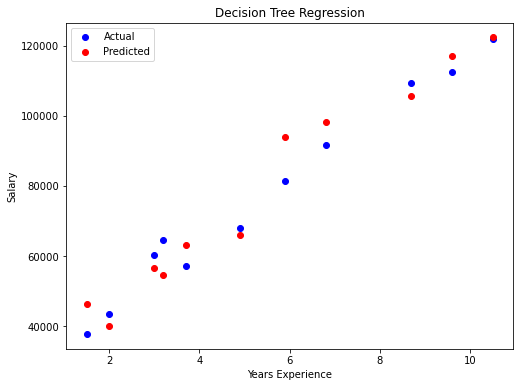

In [46]:
# Visualization of the decision tree regression results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.scatter(X_test, Y_pred, color='red', label='Predicted')
plt.title('Decision Tree Regression')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Random forest

In [47]:
# Create and train the random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train.values.reshape(-1, 1), Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test.values.reshape(-1, 1))
print(Y_pred)

[115095.73        97854.91        60899.92333333 120490.74
  66398.27        56074.155       44997.49        54394.32
 107967.91        42801.17        89834.57      ]


In [48]:
# Calculate the R2 score
r2 = r2_score(Y_test, Y_pred)
print("R2 score:", r2)

R2 score: 0.9641775983352838


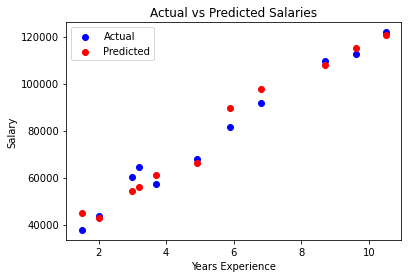

In [49]:
# Plot the actual vs predicted salaries
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.scatter(X_test, Y_pred, color='red', label='Predicted')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salaries')
plt.legend()
plt.show()